In [2]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
df=pd.read_csv('/content/drive/MyDrive/SNDA_package/Package/Final_network_graph_losses.csv')
df.head()

,Unnamed: 0,source,target,weight
0,0,Romania,Poland,0.030568
1,1,Indonesia,North Korea,0.027211
2,2,Egypt,Denmark,0.005348
3,3,Costa Rica,Switzerland,0.004484
4,4,French Guiana,Belize,0.036585


In [5]:
G=nx.from_pandas_edgelist(df.iloc[:10,:],'source','target',edge_attr='weight',create_using=nx.DiGraph())

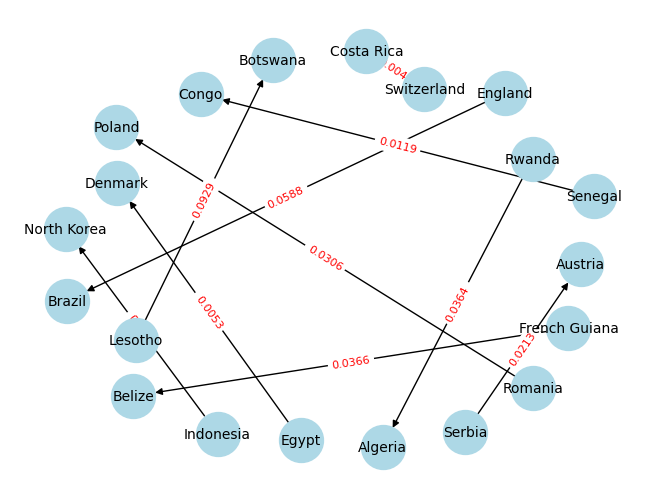

In [7]:
pos=nx.spring_layout(G,k=20)
edge_labels = nx.get_edge_attributes(G, 'weight')
edge_labels = {edge: f"{weight:.4f}" for edge, weight in edge_labels.items()}
nx.draw(G, pos, with_labels=True, node_size=1000, node_color="lightblue", font_size=10, font_color="black")
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8, font_color="red")
plt.show()

In [8]:
G=nx.from_pandas_edgelist(df,'source','target',edge_attr='weight',create_using=nx.DiGraph())

In [12]:
print("No of nodes :",G.number_of_nodes())
print("No of edges :",G.number_of_edges())
weighted_clustering = nx.clustering(G, weight='weight')
print("Top 10 Weighted clustering coefficient :",pd.Series(weighted_clustering).sort_values(ascending=False).head(10))
if nx.is_strongly_connected(G):
    print("Eccentricity of nodes :\n", nx.eccentricity(G))
else:
    print("The graph is not connected, so eccentricity cannot be calculated.")
    largest_cc = max(nx.strongly_connected_components(G), key=len)
    min_cc=min(nx.strongly_connected_components(G), key=len)
    print("No of nodes in the largest connected component :",len(largest_cc))
    print("No of nodes in the smallest connected component :",len(min_cc))
    subgraph = G.subgraph(largest_cc)
    print("Eccentricity of nodes in the smallest connected component:\n", nx.eccentricity(G.subgraph(min_cc)))

No of nodes : 334
No of edges : 9704
Top 10 Weighted clustering coefficient : Chechnya         0.344626
Maule Sur        0.314980
Aymara           0.314980
Mapuche          0.314980
Niue             0.242105
South Yemen      0.196850
Malaya           0.196022
Donetsk PR       0.177667
Western Samoa    0.150249
East Timor       0.145332
dtype: float64
The graph is not connected, so eccentricity cannot be calculated.
No of nodes in the largest connected component : 300
No of nodes in the smallest connected component : 1
Eccentricity of nodes in the smallest connected component:
 {'Surrey': 0}


In [ ]:
df[df['target']=='Surrey']

,Unnamed: 0,source,target,weight
420,420,Barawa,Surrey,0.111111


In [ ]:
df[(df['source']=='Barawa') | (df['target']=='Surrey')]

,Unnamed: 0,source,target,weight
245,245,Barawa,Tamil Eelam,0.111111
420,420,Barawa,Surrey,0.111111
691,691,Barawa,Chagos Islands,0.111111
1341,1341,Barawa,Northern Cyprus,0.111111
2876,2876,Barawa,Kernow,0.111111
5114,5114,Barawa,Panjab,0.111111
7293,7293,Barawa,Western Armenia,0.111111
8394,8394,Barawa,Yorkshire,0.111111
9063,9063,Barawa,Cascadia,0.111111


In [13]:
degree_centrality = nx.degree_centrality(G)
nodes_d=max(degree_centrality, key=degree_centrality.get)
print("Node with highest degree centrality :",nodes_d)
print("This suggests that ",nodes_d," has played matched with a lot of different teams and has lost atleast one match against each of those teams.")

Node with highest degree centrality : South Korea
This suggests that  South Korea  has played matched with a lot of different teams and has lost atleast one match against each of those teams.


So from this we can infer that South Korea has played matches with more number of teams and have lost atleast one match with them.

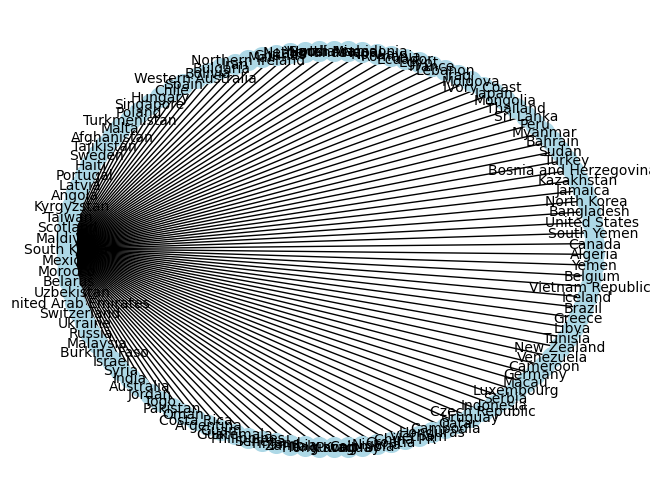

In [22]:
G1=nx.from_pandas_edgelist(df.query('source==\'South Korea\' or target==\'South Korea\''),'source','target',edge_attr='weight',create_using=nx.Graph())
nx.draw(G1, nx.shell_layout(G1), with_labels=True, node_size=200, node_color="lightblue", font_size=10, font_color="black")

In [14]:
eigen_centrality = nx.eigenvector_centrality(G)
nodes_e=max(eigen_centrality, key=eigen_centrality.get)
print("Node with highest eigen vector centrality :",nodes_e)
print("The node ",nodes_e," has played and lost atleast one match with many strong oppositions.")

Node with highest eigen vector centrality : France
The node  France  has played and lost atleast one match with many strong oppositions.


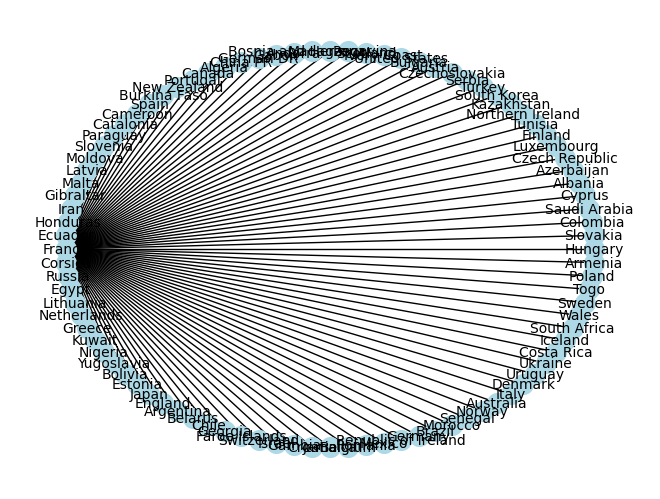

In [15]:
G1=nx.from_pandas_edgelist(df.query('source==\'France\' or target==\'France\''),'source','target',edge_attr='weight',create_using=nx.Graph())
nx.draw(G1, nx.shell_layout(G1), with_labels=True, node_size=200, node_color="lightblue", font_size=10, font_color="black")

In [25]:
print("On the whole the nodes",set([nodes_d, nodes_e])," are highly famous teams in terms of the above centrality measures.")

On the whole the nodes {'France', 'South Korea'}  are highly famous teams in terms of the above centrality measures.


In [16]:
page_rank = nx.pagerank(G)
nodes_p=max(page_rank, key=page_rank.get)
print("Node with highest page rank :",nodes_p)
print("The nodes ",nodes_p,"is/are highly influential in terms of page rank.")


Node with highest page rank : Brazil
The nodes  Brazil is/are highly influential in terms of page rank.


In [17]:
sum(page_rank.values())

1.0000000000000004

In [ ]:
page_rank=sorted(page_rank.items(),key=lambda x:x[1],reverse=True)
page_ranks=[]
j=1
for i in range(len(page_rank)):
  temp=(j,page_rank[i][0])
  j+=1
  page_ranks.append(temp)
page_ranks

[(1, 'Brazil'),
 (2, 'Argentina'),
 (3, 'Germany'),
 (4, 'England'),
 (5, 'France'),
 (6, 'Uruguay'),
 (7, 'Italy'),
 (8, 'Hungary'),
 (9, 'Padania'),
 (10, 'Spain'),
 (11, 'Netherlands'),
 (12, 'Sweden'),
 (13, 'Jersey'),
 (14, 'Mexico'),
 (15, 'Guernsey'),
 (16, 'Belgium'),
 (17, 'Austria'),
 (18, 'Scotland'),
 (19, 'Northern Cyprus'),
 (20, 'South Korea'),
 (21, 'Russia'),
 (22, 'Denmark'),
 (23, 'Portugal'),
 (24, 'Switzerland'),
 (25, 'Poland'),
 (26, 'Czechoslovakia'),
 (27, 'Chile'),
 (28, 'Turkey'),
 (29, 'Paraguay'),
 (30, 'Japan'),
 (31, 'United States'),
 (32, 'Romania'),
 (33, 'Yugoslavia'),
 (34, 'Egypt'),
 (35, 'Norway'),
 (36, 'Saudi Arabia'),
 (37, 'Australia'),
 (38, 'Colombia'),
 (39, 'Ellan Vannin'),
 (40, 'Republic of Ireland'),
 (41, 'Bulgaria'),
 (42, 'Peru'),
 (43, 'Ghana'),
 (44, 'Iran'),
 (45, 'Nigeria'),
 (46, 'Ivory Coast'),
 (47, 'Wales'),
 (48, 'Tunisia'),
 (49, 'Cameroon'),
 (50, 'Morocco'),
 (51, 'Trinidad and Tobago'),
 (52, 'Zambia'),
 (53, 'Occitania')

In [ ]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

url = "https://en.wikipedia.org/wiki/FIFA_Men%27s_World_Ranking"

response = requests.get(url)

if response.status_code == 200:
    soup = BeautifulSoup(response.content, "html.parser")
    table = soup.find("table", class_="wikitable")

    if table:
        rows = table.find_all("tr")
        team_data = []
        for row in rows[1:]:
            cells = row.find_all("td")
            if len(cells) >= 4:
                rank = cells[0].text.strip()
                confederation = cells[2].text.strip()
                team_data.append({
                    "Rank": rank,
                    "Team": confederation,
                })
        df_team_rank = pd.DataFrame(team_data)
        print(df_team_rank)
    else:
        print("Table not found on the page.")
else:
    print(f"Failed to retrieve page. Status code: {response.status_code}")


   Rank           Team
0     1      Argentina
1     2         France
2     3          Spain
3     4        England
4     5         Brazil
5     6        Belgium
6     7    Netherlands
7     8       Portugal
8     9       Colombia
9    10          Italy
10   11        Uruguay
11   12        Croatia
12   13        Germany
13   14        Morocco
14   15    Switzerland
15   16          Japan
16   17         Mexico
17   18  United States
18   19           Iran
19   20        Denmark


In [ ]:
page_rank_dict = {team: rank for rank, team in page_ranks}
df_team_rank['PageRank'] = df_team_rank['Team'].map(page_rank_dict)
print(df_team_rank)

   Rank           Team  PageRank
0     1      Argentina         2
1     2         France         5
2     3          Spain        10
3     4        England         4
4     5         Brazil         1
5     6        Belgium        16
6     7    Netherlands        11
7     8       Portugal        23
8     9       Colombia        38
9    10          Italy         7
10   11        Uruguay         6
11   12        Croatia        63
12   13        Germany         3
13   14        Morocco        50
14   15    Switzerland        24
15   16          Japan        30
16   17         Mexico        14
17   18  United States        31
18   19           Iran        44
19   20        Denmark        22


In [ ]:
df_team_rank['Rank'] = pd.to_numeric(df_team_rank['Rank'], errors='coerce')

correlation = df_team_rank['Rank'].corr(df_team_rank['PageRank'], method='pearson')
print(f"Correlation between FIFA Rank and PageRank: {correlation}")

df_team_rank['Rank_Difference'] = df_team_rank['Rank'] - df_team_rank['PageRank']
print(df_team_rank[['Team', 'Rank', 'PageRank', 'Rank_Difference']])


Correlation between FIFA Rank and PageRank: 0.5343430548773304
             Team  Rank  PageRank  Rank_Difference
0       Argentina     1         2               -1
1          France     2         5               -3
2           Spain     3        10               -7
3         England     4         4                0
4          Brazil     5         1                4
5         Belgium     6        16              -10
6     Netherlands     7        11               -4
7        Portugal     8        23              -15
8        Colombia     9        38              -29
9           Italy    10         7                3
10        Uruguay    11         6                5
11        Croatia    12        63              -51
12        Germany    13         3               10
13        Morocco    14        50              -36
14    Switzerland    15        24               -9
15          Japan    16        30              -14
16         Mexico    17        14                3
17  United States  


Team with the largest positive Rank Difference: Germany (Difference: 10)
Team with the largest negative Rank Difference: Croatia (Difference: -51)


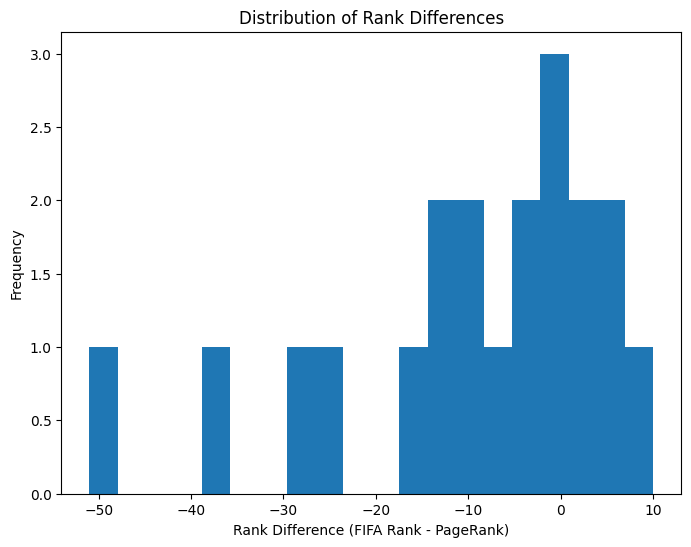

In [ ]:

# Find teams with the largest positive and negative Rank Differences
largest_positive_diff = df_team_rank.loc[df_team_rank['Rank_Difference'].idxmax()]
largest_negative_diff = df_team_rank.loc[df_team_rank['Rank_Difference'].idxmin()]

print(f"\nTeam with the largest positive Rank Difference: {largest_positive_diff['Team']} (Difference: {largest_positive_diff['Rank_Difference']})")
print(f"Team with the largest negative Rank Difference: {largest_negative_diff['Team']} (Difference: {largest_negative_diff['Rank_Difference']})")

plt.figure(figsize=(8, 6))
plt.hist(df_team_rank['Rank_Difference'], bins=20)
plt.xlabel('Rank Difference (FIFA Rank - PageRank)')
plt.ylabel('Frequency')
plt.title('Distribution of Rank Differences')
plt.show()


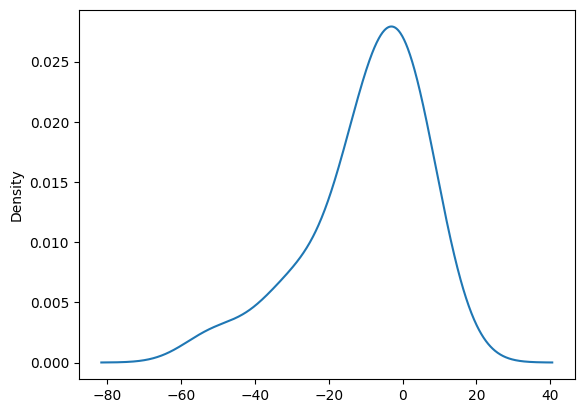

In [ ]:
df_team_rank['Rank_Difference'].plot(kind='kde')
plt.show()


In [26]:
from networkx.algorithms.community import girvan_newman
communities = girvan_newman(G)
top_level_communities = next(communities)
community_list = [list(c) for c in top_level_communities]
print("Detected communities:", community_list)


Detected communities: [['Georgia', 'China PR', 'Chad', 'Brittany', 'Kosovo', 'German DR', 'Samoa', 'Sierra Leone', 'Republic of Ireland', 'Senegal', 'Panama', 'Madagascar', 'Barbados', 'Cambodia', 'Faroe Islands', 'United Arab Emirates', 'Guernsey', 'Zambia', 'Vietnam', 'Malta', 'Bangladesh', 'Macau', 'Japan', 'Turkmenistan', 'Guinea', 'Cyprus', 'Eritrea', 'Morocco', 'Croatia', 'Burundi', 'Netherlands', 'Galicia', 'Bhutan', 'South Yemen', 'Wales', 'Sri Lanka', 'Curaçao', 'Maldives', 'Ynys Môn', 'Sint Maarten', 'Iran', 'Tajikistan', 'Uruguay', 'Haiti', 'Mauritania', 'Djibouti', 'Shetland', 'Menorca', 'Egypt', 'Algeria', 'Liberia', 'Armenia', 'Finland', 'New Zealand', 'Malawi', 'Zanzibar', 'Philippines', 'Dominican Republic', 'Spain', 'Russia', 'Orkney', 'Luxembourg', 'Namibia', 'Romania', 'Vanuatu', 'Mayotte', 'Kuwait', 'Israel', 'Andorra', 'Nicaragua', 'Seychelles', 'Canary Islands', 'Greece', 'Mexico', 'Liechtenstein', 'Austria', 'Comoros', 'Asturias', 'Mali', 'Sark', 'Kiribati', 'Slo

In [27]:
print("No of communities :",len(community_list))

No of communities : 3


In [28]:
community_densities = {}
for i, community in enumerate(community_list):
    subgraph = G.subgraph(community)
    density = nx.density(subgraph)
    community_densities[f"Community {i+1}"] = density
print("Density of each community:")
for community, density in community_densities.items():
    print(f"{community}: {density:.4f}")

Density of each community:
Community 1: 0.1229
Community 2: 0.0704
Community 3: 0.5000


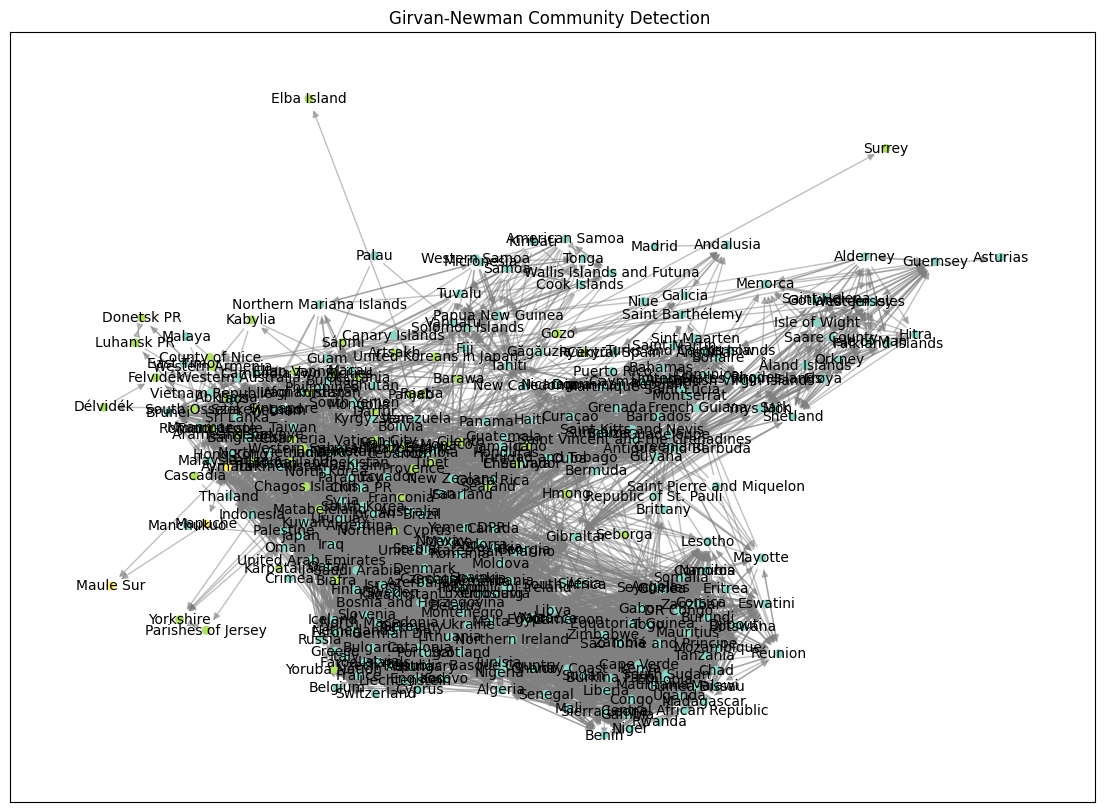

In [29]:
color_map = {}
for idx, community in enumerate(community_list):
    for node in community:
        color_map[node] = idx
plt.figure(figsize=(14, 10))
pos = nx.fruchterman_reingold_layout(G, seed=42, k=0.15)
colors = [color_map[node] for node in G.nodes()]
node_sizes = [30 if node in color_map else 10 for node in G.nodes()]

nx.draw_networkx_nodes(G, pos, node_color=colors, node_size=node_sizes, cmap=plt.cm.Set3)
nx.draw_networkx_edges(G, pos, edge_color='gray', alpha=0.5, arrowsize=10)
nx.draw_networkx_labels(G, pos, font_size=10, font_color="black")

plt.title("Girvan-Newman Community Detection ")
plt.show()

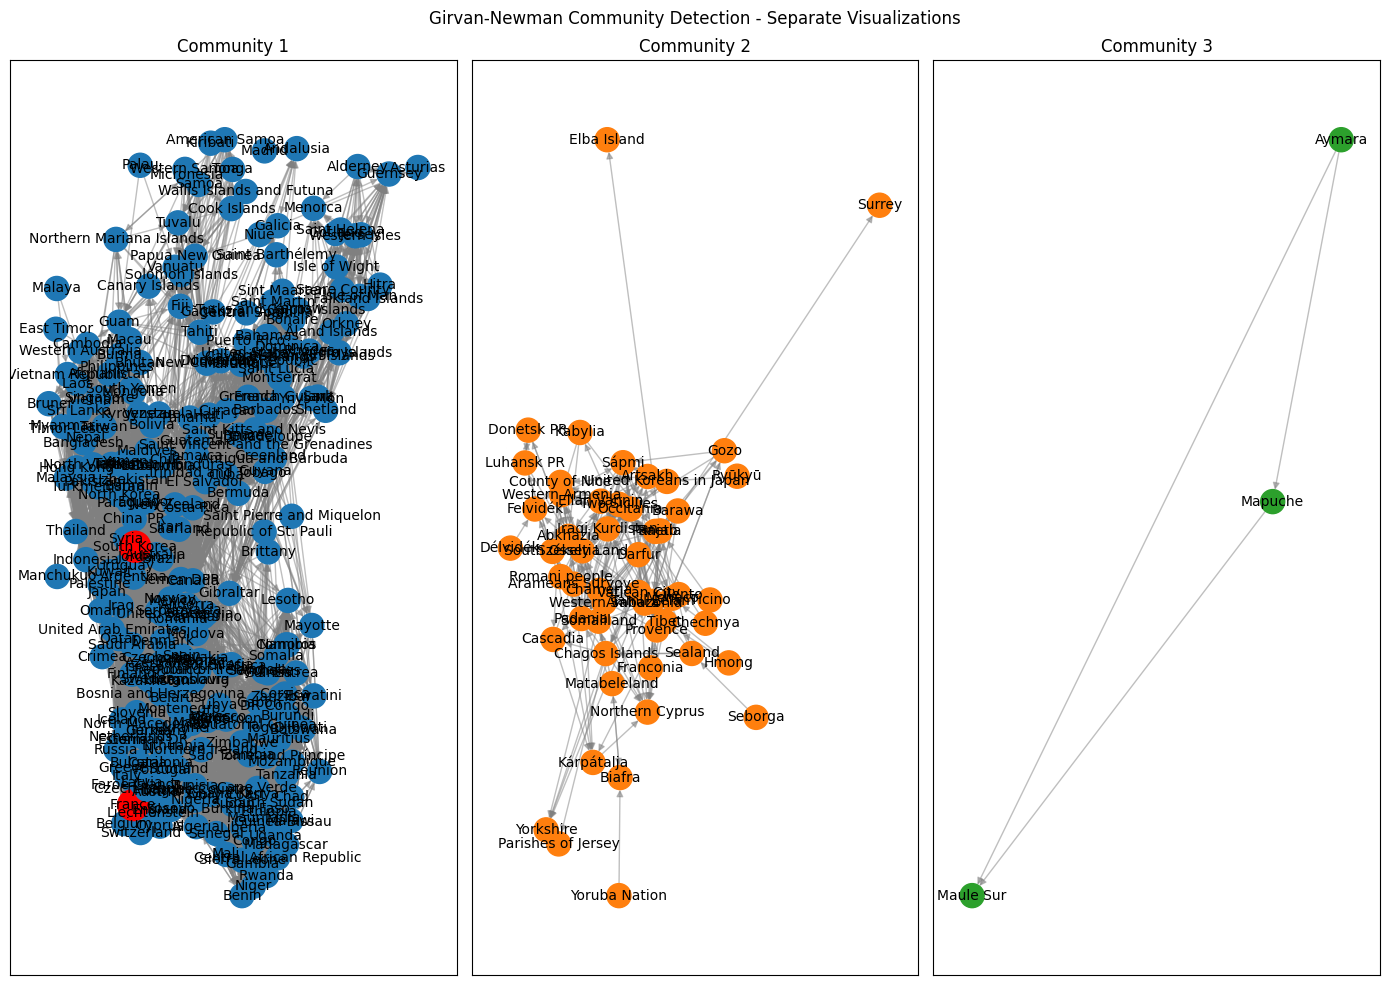

In [32]:
import matplotlib.pyplot as plt
import networkx as nx
from networkx.algorithms.community import girvan_newman


communities = girvan_newman(G)
top_level_communities = next(communities)
community_list = [list(c) for c in top_level_communities]
pos = nx.fruchterman_reingold_layout(G, seed=42, k=0.15)
plt.figure(figsize=(14, 10))


for idx, community in enumerate(community_list):
    plt.subplot(1, len(community_list), idx + 1)
    subgraph = G.subgraph(community)
    node_colors = []
    node_sizes = []
    for node in subgraph.nodes():
        if node in ["South Korea", "France"]:
            node_colors.append("red")
            node_sizes.append(500)
        else:
            node_colors.append(f"C{idx}")
            node_sizes.append(300)
    nx.draw_networkx_nodes(subgraph, pos, node_size=node_sizes, node_color=node_colors, label=f"Community {idx+1}")
    nx.draw_networkx_edges(subgraph, pos, edge_color="gray", alpha=0.5)
    nx.draw_networkx_labels(subgraph, pos, font_size=10, font_color="black")

    plt.title(f"Community {idx + 1}")

plt.suptitle("Girvan-Newman Community Detection - Separate Visualizations")
plt.tight_layout()
plt.show()


In [34]:
for idx, community in enumerate(community_list):
    print("Community :",idx+1)
    print("No of nodes :",len(community))

Community : 1
No of nodes : 278
Community : 2
No of nodes : 53
Community : 3
No of nodes : 3
